<div align='center'>

# Linear Regression

### Part of Scientific-ML-Notes 

[![GitHub](https://img.shields.io/badge/GitHub-Repository-black?logo=github&scale=5)](https://github.com/mhnaderi/Scientific-ML-Notes)

---

In [1]:
# Always run this cell first to import all necessary libraries and to set up the notebook environment

# Importing necessary libraries
import numpy as np
import scipy as sp
import numpy.linalg as la

# Importing matplotlib for plotting
import matplotlib.pyplot as plt

# Enabling inline plotting for Jupyter Notebook
%matplotlib inline

# Configuring the inline backend for better quality figures
%config InlineBackend.figure_format = 'svg'

# Updating matplotlib parameters for consistent styling
plt.rcParams.update({
    "font.family": "serif",  # Setting font family to serif
    "figure.facecolor": 'white',  # Setting figure background color to white
    "axes.facecolor": 'white'  # Setting axes background color to white
})

# Interpolation

Interpolation involves constructing a function that exactly fits a set of given data points. Given the data:

$$
(x_1, y_1),\ (x_2, y_2),\ \ldots,\ (x_N, y_N), \quad \text{where} \quad x_1 < x_2 < \cdots < x_N,
$$

our objective is to find a function $f : \mathbb{R} \rightarrow \mathbb{R}$ satisfying:

$$
f(x_i) = y_i, \quad \text{for} \quad i = 1, 2, \ldots, N.
$$

By definition, the interpolating function passes through each of the provided data points.

We can represent $f(x)$ as a linear combination of basis functions:

$$
f(x) = \sum_{k=1}^N \theta_k\, \phi_k(x),
$$

where:

- $\,\phi_k(x)\,$ are the chosen basis functions,
- $\,\theta_k\,$ are the coefficients to be determined.

At the data points $\,x_i\,$, this expression leads to a system of equations:

$$
\sum_{k=1}^N \theta_k\, \phi_k(x_i) = y_i, \quad \text{for} \quad i = 1, 2, \ldots, N.
$$

In matrix form, this system is written as:

$$
\boldsymbol{\Phi}\, \boldsymbol{\theta} = \boldsymbol{y},
$$

where:

- $\,\boldsymbol{\Phi}\,$ is an $\,N \times N\,$ matrix with elements $\,\Phi_{ik} = \phi_k(x_i)\,$,
- $\,\boldsymbol{\theta} = [\theta_1, \theta_2, \ldots, \theta_N]^T\,$ is the vector of coefficients,
- $\,\boldsymbol{y} = [y_1, y_2, \ldots, y_N]^T\,$ is the vector of data values.

Given that the basis functions and data points are known, we can solve for $\,\boldsymbol{\theta}\,$:

$$
\boldsymbol{\theta} = \boldsymbol{\Phi}^{-1}\, \boldsymbol{y}.
$$

This formulation results in a model that is **linear in the parameters** $\,\boldsymbol{\theta}\,$, even if the basis functions $\,\phi_k(x)\,$ are nonlinear.

## Basis Functions

The choice of basis functions $\,\phi_k(x)\,$ is crucial for the accuracy and stability of the interpolation.

### 1. Monomial Basis

A simple choice is the monomial basis:

$$
\phi_k(x) = x^{k-1}, \quad k = 1, 2, \ldots, N.
$$

The corresponding matrix $\,\boldsymbol{\Phi}\,$ (Vandermonde matrix) is:

$$
\boldsymbol{\Phi} =
\begin{bmatrix}
1 & x_1 & x_1^2 & \cdots & x_1^{N-1} \\
1 & x_2 & x_2^2 & \cdots & x_2^{N-1} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_N & x_N^2 & \cdots & x_N^{N-1}
\end{bmatrix}.
$$

While straightforward, the monomial basis can lead to numerical instability due to the ill-conditioning of the Vandermonde matrix, especially for high-degree polynomials.

### 2. Orthogonal Polynomial Bases

To improve stability, orthogonal polynomials can be used.

**Legendre Polynomials** are orthogonal on the interval $\,[-1, 1]\,$:

$$
\begin{align*}
\phi_1(x) &= 1, \\
\phi_2(x) &= x, \\
\phi_3(x) &= \tfrac{1}{2}(3x^2 - 1), \\
\phi_4(x) &= \tfrac{1}{2}(5x^3 - 3x), \quad \ldots
\end{align*}
$$

**Chebyshev Polynomials** also form an orthogonal set on $\,[-1, 1]\,$ and are related to trigonometric functions via $\,x = \cos(\theta)\,$:

$$
T_n(x) = \cos(n\, \theta), \quad \text{with} \quad x = \cos(\theta).
$$

The first few are:

$$
T_0(x) = 1, \quad T_1(x) = x, \quad T_2(x) = 2x^2 - 1, \quad T_3(x) = 4x^3 - 3x, \quad \ldots
$$

Chebyshev polynomials reduce oscillations in the interpolating polynomial and are effective in minimizing interpolation errors.

### 3. Fourier Basis

For periodic functions, the Fourier basis is appropriate:

$$
\phi_k(x) = \sin(kx), \quad \phi_{k+N}(x) = \cos(kx), \quad k = 1, 2, \ldots
$$

The sine and cosine functions are orthogonal over certain intervals, making them suitable for representing periodic behavior.

### 4. Lagrange Basis

The Lagrange basis functions are constructed to be $1$ at one data point and $0$ at all others:

$$
\phi_i(x) = \prod_{\substack{j=1 \\ j \neq i}}^N \frac{x - x_j}{x_i - x_j}, \quad i = 1, 2, \ldots, N.
$$

The interpolating function is then:

$$
f(x) = \sum_{i=1}^N y_i\, \phi_i(x).
$$

In this case, the coefficients are the data values themselves ($\,\theta_i = y_i\,$).

## High-Degree Polynomial Interpolation and the Runge Phenomenon

High-degree polynomial interpolation can suffer from significant oscillations, especially near the interval's endpoints—a problem known as the **Runge phenomenon**. These oscillations can lead to inaccurate approximations between data points.

To address this issue, using Chebyshev nodes (specific choices of interpolation points) can greatly improve the interpolation quality. Chebyshev nodes cluster more points near the endpoints, reducing oscillations and providing a more accurate representation of the underlying function.

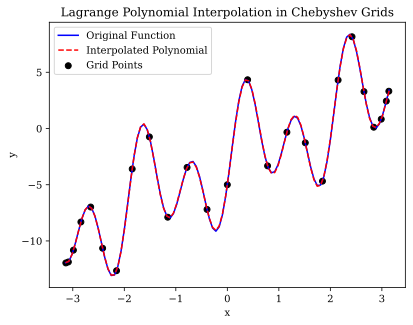

In [2]:
def lagrange(xe, x):
    L = []
    for i in range(-1, len(x)-1):
        fac = 1
        for j in range(-1, len(x)-1):
            if j != i:
                fac = fac * (xe - x[j+1]) / (x[i+1] - x[j+1])
        L.append(fac)
    return np.array(L)

# Generate Chebyshev collocation points
cheb_coll_points = lambda a, b, n: 0.5 * (a + b) + 0.5 * (b - a) * np.cos((2 * np.arange(n) + 1) * np.pi / (2 * n))

xc = cheb_coll_points(-np.pi, np.pi, 25)

# Define the function to interpolate
f = lambda x: -3 + 2 * x + 3 * np.sin(np.pi * x) - 4 * np.cos(2 * np.pi * x + np.pi / 3)

# Generate points for interpolation
xi = np.linspace(-np.pi, np.pi, 100)

# Compute the Lagrange basis polynomials
Phi = lagrange(xi, xc).T

# Plot the original function and the interpolated polynomial
plt.plot(xi, f(xi), 'b-', label='Original Function')
plt.plot(xi, Phi @ f(xc), 'r--', label='Interpolated Polynomial')
plt.scatter(xc, f(xc), color='black', label='Grid Points')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Lagrange Polynomial Interpolation in Chebyshev Grids')
plt.show()

Despite practical limitations, polynomial interpolation holds significant theoretical importance. The **Weierstrass Approximation Theorem** assures us that any continuous function defined on a closed interval can be approximated arbitrarily well by a polynomial function.

**Weierstrass Approximation Theorem:** Let $f$ be a continuous function on $[-1, 1]$, and let $\varepsilon > 0$ be given. Then there exists a polynomial $p$ such that:
$$
\|f - p\|_{\infty} < \varepsilon,
$$
where the norm $\|f - p\|_{\infty} = \sup_{x \in [-1, 1]} |f(x) - p(x)|$ represents the maximum difference between $f$ and $p$ over the interval.

This theorem guarantees that for any continuous function and any desired level of accuracy, we can find a polynomial that approximates the function within that accuracy on the interval. However, when applying polynomial interpolation in practice, especially with high-degree polynomials, we may encounter numerical instability and oscillations—a problem known as the **Runge phenomenon**. This phenomenon underscores the challenges in polynomial interpolation, illustrating that while polynomials can theoretically approximate continuous functions to any degree of precision, practical implementation requires careful consideration to avoid instability.

# Regression and the Least Squares Method

While interpolation requires the model to pass exactly through all given data points, **regression** seeks to find a function that best fits the data, especially when the data may contain noise or when an exact fit is not feasible or desired. The goal is to approximate the underlying relationship between the input $x$ and the output $y$ by finding a function $f(x; \boldsymbol{\theta})$ that minimizes the discrepancy between the predicted and observed values.

We model $f(x; \boldsymbol{\theta})$ as a linear combination of basis functions:

$$
f(x; \boldsymbol{\theta}) = \sum_{k=1}^M \theta_k\, \phi_k(x) = \boldsymbol{\phi}(x)^T \boldsymbol{\theta},
$$

where:

- $\phi_k(x)$ are the chosen basis functions,
- $\theta_k$ are the coefficients to be determined,
- $\boldsymbol{\phi}(x) = [\phi_1(x), \phi_2(x), \ldots, \phi_M(x)]^T$ is the vector of basis functions evaluated at $x$.

Given a set of $N$ data points $(x_i, y_i)$, we construct the **design matrix** $\boldsymbol{\Phi}$ by evaluating the basis functions at each data point:

$$
\boldsymbol{\Phi} =
\begin{bmatrix}
\phi_1(x_1) & \phi_2(x_1) & \cdots & \phi_M(x_1) \\
\phi_1(x_2) & \phi_2(x_2) & \cdots & \phi_M(x_2) \\
\vdots      & \vdots      & \ddots & \vdots      \\
\phi_1(x_N) & \phi_2(x_N) & \cdots & \phi_M(x_N)
\end{bmatrix}_{N \times M},
$$

and collect the coefficients and outputs into vectors:

$$
\boldsymbol{\theta} =
\begin{bmatrix}
\theta_1 \\
\theta_2 \\
\vdots \\
\theta_M
\end{bmatrix}_{M \times 1}, \quad
\boldsymbol{y} =
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_N
\end{bmatrix}_{N \times 1}.
$$

Our model predicts the outputs at the data points as:

$$
\boldsymbol{f} = \boldsymbol{\Phi} \boldsymbol{\theta}.
$$

The **residuals** (errors) between the predicted and actual outputs are:

$$
\boldsymbol{r} = \boldsymbol{y} - \boldsymbol{f} = \boldsymbol{y} - \boldsymbol{\Phi} \boldsymbol{\theta}.
$$

The **least squares method** seeks the coefficients $\boldsymbol{\theta}$ that minimize the sum of the squared residuals:

$$
\min_{\boldsymbol{\theta}} \| \boldsymbol{y} - \boldsymbol{\Phi} \boldsymbol{\theta} \|^2.
$$

To find the minimizing $\boldsymbol{\theta}$, we set the gradient of the objective function with respect to $\boldsymbol{\theta}$ to zero, leading to the **normal equations**:

$$
\boldsymbol{\Phi}^T \boldsymbol{\Phi} \boldsymbol{\theta} = \boldsymbol{\Phi}^T \boldsymbol{y}.
$$

Solving for $\boldsymbol{\theta}$ gives:

$$
\boldsymbol{\theta} = \left( \boldsymbol{\Phi}^T \boldsymbol{\Phi} \right)^{-1} \boldsymbol{\Phi}^T \boldsymbol{y} = \boldsymbol{\Phi}^{\dagger} \boldsymbol{y},
$$

where $\boldsymbol{\Phi}^{\dagger}$ denotes the **Moore-Penrose pseudoinverse** of $\boldsymbol{\Phi}$.

In practice, especially when $N > M$ (more data points than basis functions) or when $\boldsymbol{\Phi}^T \boldsymbol{\Phi}$ is ill-conditioned, computing the inverse directly may be numerically unstable. Alternative methods such as **QR decomposition** or **singular value decomposition (SVD)** are often used to compute the least squares solution more robustly.

## Choosing Basis Functions and Model Complexity

The selection of basis functions $\phi_k(x)$ significantly impacts the performance and stability of the regression model. Common choices include:

- **Polynomial functions**: $\phi_k(x) = x^{k-1}$,
- **Trigonometric functions**: useful for periodic data,
- **Piecewise functions**: such as splines for localized fitting.

The number of basis functions $M$ controls the complexity of the model:

- **Underfitting** occurs when $M$ is too small to capture the underlying structure of the data, leading to high bias.
- **Overfitting** happens when $M$ is too large, causing the model to capture noise in the data, leading to high variance.

To achieve a good balance, it is important to select a model complexity that captures the essential patterns without fitting the noise. Techniques such as **cross-validation** can help determine the optimal number of basis functions.

### Importance of Well-Conditioned Basis Functions

Similar to interpolation, choosing a well-conditioned set of basis functions is crucial for numerical stability and the reliability of the regression coefficients $\boldsymbol{\theta}$. Poorly conditioned bases can amplify errors due to limited numerical precision.

**Orthogonal basis functions**—such as Legendre or Chebyshev polynomials—are often preferred because they reduce collinearity among the columns of $\boldsymbol{\Phi}$. This improves the conditioning of $\boldsymbol{\Phi}^T \boldsymbol{\Phi}$ and leads to more stable solutions.

For example, using **Legendre polynomials** as basis functions:

$$
\begin{align*}
\phi_1(x) &= 1, \\
\phi_2(x) &= x, \\
\phi_3(x) &= \tfrac{1}{2}(3x^2 - 1), \quad \ldots
\end{align*}
$$

These polynomials are orthogonal over the interval $[-1, 1]$ with respect to the weight function $w(x) = 1$, which helps in minimizing the correlation between the basis functions.

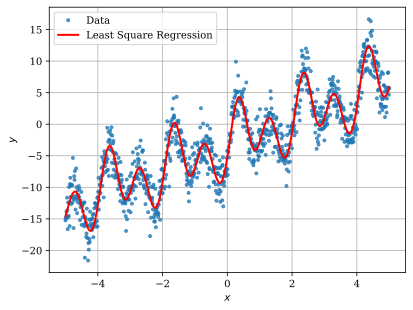

In [3]:
# Parameters
N = 1000
M = 12

# Generate data
x = np.linspace(-5, 5, N)
y = -3 + 2 * x + 3 * np.sin(np.pi * x) - 4 * np.cos(2 * np.pi * x + np.pi / 3) + np.random.normal(scale=2, size=N)

# Construct the design matrix Phi
# Uncomment one of the following lines to use a different polynomial basis
# Phi = np.polynomial.polynomial.polyvander(x, M-1)
# Phi = np.polynomial.chebyshev.chebvander(x, M-1)
# Phi = np.polynomial.laguerre.lagvander(x, M-1)
# Phi = np.polynomial.legendre.legvander(x, M-1)
Phi = []
for i in range(1, M // 4 + 1):
    Phi += [np.sin(i * np.pi * x), np.cos(i * np.pi * x)]
Phi = np.hstack((np.polynomial.polynomial.polyvander(x, M // 2 - 1), np.array(Phi).T))

# Solve for the coefficients using least squares
Theta = la.solve(Phi.T @ Phi, Phi.T @ y)

# Compute the fitted values
f = Phi @ Theta

# Plot the data and the fitted curve
fig, ax = plt.subplots()
ax.plot(x, y, '.', alpha=0.75, label='Data')
ax.plot(x, f, 'r', lw=2.0, label='Least Square Regression')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.legend()
ax.grid(True)
plt.show()

## Ridge Regression

When building regression models, especially with complex or highly correlated predictors, there's a risk of **overfitting**—where the model captures noise rather than the underlying relationship. **Ridge regression** addresses this issue by adding a penalty term to the least squares error function, discouraging large coefficients and thus reducing model complexity.

### Objective Function

Ridge regression seeks to find the parameter vector $\boldsymbol{\theta}$ that minimizes the following function:

$$
\boldsymbol{\theta} = \arg\min_{\boldsymbol{\theta}} \left\{ \sum_{i=1}^N \left( y_i - \boldsymbol{\phi}(x_i)^T \boldsymbol{\theta} \right)^2 + \lambda \sum_{j=1}^M \theta_j^2 \right\}
$$

Here:

- $\boldsymbol{y} = [y_1, y_2, \ldots, y_N]^T$ are the observed outputs.
- $\boldsymbol{\phi}(x_i)$ is the vector of basis functions evaluated at input $x_i$.
- $\boldsymbol{\theta} = [\theta_1, \theta_2, \ldots, \theta_M]^T$ are the model coefficients.
- $\lambda \geq 0$ is the **regularization parameter** controlling the strength of the penalty.

The first term measures the fit of the model to the data (sum of squared errors), while the second term penalizes large values of the coefficients, promoting simpler models.

### Connection to Constrained Optimization

Alternatively, ridge regression can be viewed as minimizing the residual sum of squares subject to a constraint on the coefficients:

**Minimize:**

$$
\sum_{i=1}^N \left( y_i - \boldsymbol{\phi}(x_i)^T \boldsymbol{\theta} \right)^2
$$

**Subject to:**

$$
\sum_{j=1}^M \theta_j^2 \leq s
$$

where $s \geq 0$ is a predefined threshold controlling the total magnitude of the coefficients.

### Solving with Lagrange Multipliers

To solve this constrained optimization problem, we use the method of Lagrange multipliers. We construct the Lagrangian function:

$$
L(\boldsymbol{\theta}, \nu) = \sum_{i=1}^N \left( y_i - \boldsymbol{\phi}(x_i)^T \boldsymbol{\theta} \right)^2 + \nu \left( \sum_{j=1}^M \theta_j^2 - s \right)
$$

Here, $\nu \geq 0$ is the Lagrange multiplier associated with the constraint.

### Derivation of the Ridge Regression Solution

1. **Compute the Gradient with Respect to $\boldsymbol{\theta}$:**

   Set the derivative of the Lagrangian with respect to $\boldsymbol{\theta}$ to zero:

   $$
   \frac{\partial L}{\partial \boldsymbol{\theta}} = -2 \boldsymbol{\Phi}^T (\boldsymbol{y} - \boldsymbol{\Phi} \boldsymbol{\theta}) + 2 \nu \boldsymbol{\theta} = \boldsymbol{0}
   $$

   where $\boldsymbol{\Phi}$ is the design matrix:

   $$
   \boldsymbol{\Phi} =
   \begin{bmatrix}
   \boldsymbol{\phi}(x_1)^T \\
   \boldsymbol{\phi}(x_2)^T \\
   \vdots \\
   \boldsymbol{\phi}(x_N)^T
   \end{bmatrix}
   $$

2. **Rewriting the Equation:**

   $$
   \boldsymbol{\Phi}^T \boldsymbol{\Phi} \boldsymbol{\theta} + \nu \boldsymbol{\theta} = \boldsymbol{\Phi}^T \boldsymbol{y}
   $$

3. **Express the Solution for $\boldsymbol{\theta}$:**

   $$
   \left( \boldsymbol{\Phi}^T \boldsymbol{\Phi} + \nu \boldsymbol{I} \right) \boldsymbol{\theta} = \boldsymbol{\Phi}^T \boldsymbol{y}
   $$

   where $\boldsymbol{I}$ is the identity matrix of size $M \times M$.

4. **Relate $\nu$ and $\lambda$:**

   The Lagrange multiplier $\nu$ is related to the regularization parameter $\lambda$ in the unconstrained form. For ridge regression, $\lambda = \nu$.

5. **Final Ridge Regression Solution:**

   $$
   \boldsymbol{\theta} = \left( \boldsymbol{\Phi}^T \boldsymbol{\Phi} + \lambda \boldsymbol{I} \right)^{-1} \boldsymbol{\Phi}^T \boldsymbol{y}
   $$

### Interpretation

- **Penalty Term:** Adding $\lambda \boldsymbol{I}$ to $\boldsymbol{\Phi}^T \boldsymbol{\Phi}$ inflates the diagonal elements, effectively penalizing large coefficients.
  
- **Shrinkage Effect:** The inclusion of the penalty term shrinks the coefficients towards zero but does not set them exactly to zero (contrast with Lasso regression).

- **Bias-Variance Trade-off:** While bias may increase due to the penalty, variance decreases, often resulting in a lower overall mean squared error on unseen data.

### Choosing the Regularization Parameter $\lambda$

- **Cross-Validation:** The optimal value of $\lambda$ is typically selected using $k$-fold cross-validation, where the data is partitioned into $k$ subsets. The model is trained on $k-1$ subsets and validated on the remaining subset, repeating this process $k$ times.

- **Effect of $\lambda$:**
  - **Large $\lambda$:** Higher penalty on coefficients leads to smaller coefficients, reducing model complexity but risking underfitting.
  - **Small $\lambda$:** Lower penalty allows coefficients to take on larger values, capturing more complexity but risking overfitting.

### Advantages of Ridge Regression

- **Mitigates Multicollinearity:** Ridge regression performs well in situations where predictor variables are highly correlated, as it reduces the variance without substantially increasing bias.

- **Stability:** The regularization term improves the conditioning of the problem (i.e., makes $\boldsymbol{\Phi}^T \boldsymbol{\Phi}$ better conditioned), making the inversion more stable numerically.

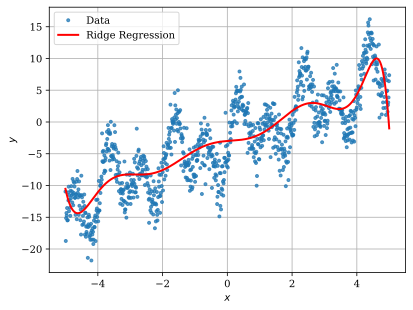

In [4]:
# Parameters
λ = 0.25
N = 1000
M = 12

# Generate data
x = np.linspace(-5, 5, N)
y = -3 + 2 * x + 3 * np.sin(np.pi * x) - 4 * np.cos(2 * np.pi * x + np.pi / 3) + np.random.normal(scale=2, size=N)

# Construct the design matrix using Chebyshev polynomials
Phi = np.polynomial.chebyshev.chebvander(x, M - 1)

# Perform Ridge Regression manually
Theta = la.solve(Phi.T @ Phi + λ * np.eye(M), Phi.T @ y)
f = Phi @ Theta

# Plot the data and the fitted curve
fig, ax = plt.subplots()
ax.plot(x, y, '.', alpha=0.75, label='Data')
ax.plot(x, f, 'r', lw=2.0, label='Ridge Regression')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.legend()
ax.grid(True)
plt.show()

## LASSO Regression

Similar to ridge regression, **LASSO (Least Absolute Shrinkage and Selection Operator) regression** adds a regularization term to the least squares objective function to prevent overfitting. However, while ridge regression uses the squared magnitude of the coefficients (L2 norm) for regularization, LASSO regression employs the sum of the absolute values of the coefficients (L1 norm). This key difference allows LASSO regression not only to shrink coefficient values but also to set some of them exactly to zero, effectively performing variable selection.

The LASSO regression optimization problem is formulated as:

$$
\boldsymbol{\theta} = \arg\min_{\boldsymbol{\theta}} \left\{ \sum_{i=1}^N \left( y_i - \boldsymbol{\phi}(x_i)^T \boldsymbol{\theta} \right)^2 + \lambda \sum_{j=1}^M |\theta_j| \right\}
$$

Where:

- $y_i$ are the observed outputs,
- $\boldsymbol{\phi}(x_i)$ is the vector of basis functions evaluated at input $x_i$,
- $\boldsymbol{\theta} = [\theta_1, \theta_2, \ldots, \theta_M]^T$ are the model coefficients,
- $\lambda \geq 0$ is the regularization parameter controlling the strength of the penalty.

Due to the absolute value function in the penalty term, the optimization problem becomes convex but not differentiable at points where any $\theta_j = 0$. This means that standard techniques used for ordinary least squares or ridge regression (which rely on setting gradients to zero) are not directly applicable. Instead, specialized algorithms such as **coordinate descent** or **subgradient methods** are employed to find the optimal coefficients.

### Sparsity and Variable Selection

A significant advantage of LASSO regression is its ability to produce **sparse models** by setting some coefficients exactly to zero. This sparsity implies that LASSO performs automatic **feature selection**, identifying and retaining only the most relevant predictors in the model. Sparse models are valuable for several reasons:

- **Interpretability**: Models with fewer predictors are easier to interpret and understand.
- **Reduced Overfitting**: By including only significant variables, the model is less likely to fit noise in the data.
- **Efficiency**: Sparse models require less computational resources for prediction.

This aligns with the principle of **Occam's Razor**, which states that among competing hypotheses, the one with the fewest assumptions should be selected.

### Understanding the Effect of the L1 Penalty

The difference between L1 (LASSO) and L2 (ridge) regularization can be understood by examining how each penalty influences the geometry of the coefficient space and the resulting solutions.

- **L2 Regularization (Ridge Regression)**:
  - The L2 penalty $\lambda \sum_{j=1}^M \theta_j^2$ constrains the coefficients to lie within an $M$-dimensional sphere centered at the origin.
  - The least squares error surface consists of elliptical contours.
  - The intersection of the elliptical contours with the spherical constraint typically occurs at points where all coefficients are small but generally nonzero.
  - As a result, ridge regression shrinks coefficients towards zero but does not enforce exact zeros, so all predictors remain in the model.

- **L1 Regularization (LASSO Regression)**:
  - The L1 penalty $\lambda \sum_{j=1}^M |\theta_j|$ constrains the coefficients to lie within an $M$-dimensional rhomboid (a shape with flat facets, like a diamond in two dimensions).
  - The sharp corners of the constraint region (where one or more coefficients are zero) increase the likelihood that the optimal solution will occur at these corners.
  - Consequently, LASSO not only shrinks coefficients but also sets some exactly to zero, producing a sparse solution.

### Relation to Different Norms

The choice of norm in the regularization term affects the nature of the solution:

- **$\ell_0$ Norm**:
  - Counts the number of nonzero coefficients.
  - Directly imposes sparsity but leads to a non-convex and combinatorial optimization problem, which is computationally infeasible for large-scale problems.

- **$\ell_1$ Norm (LASSO)**:
  - Sum of the absolute values of the coefficients.
  - Promotes sparsity while maintaining convexity of the optimization problem, making it computationally tractable.

- **$\ell_2$ Norm (Ridge)**:
  - Sum of the squares of the coefficients.
  - Encourages smaller coefficients but does not enforce sparsity.

As the value of $p$ in the $\ell_p$ norm increases from $0$ to $\infty$, the regularization effect transitions:

- For $0 \leq p \leq 1$, norms promote sparsity.
- For $p > 1$, norms encourage coefficients to be small but generally nonzero.

### Practical Considerations

**Choosing the Regularization Parameter $\lambda$**:

- The parameter $\lambda$ controls the balance between fitting the data and enforcing sparsity.
- A larger $\lambda$ places more emphasis on the penalty term, leading to more coefficients being zero (increased sparsity).
- A smaller $\lambda$ focuses more on minimizing the residual sum of squares, resulting in fewer zero coefficients.
- Selecting an appropriate $\lambda$ is critical and is typically done using cross-validation techniques to optimize model performance on unseen data.

**Algorithmic Solutions**:

- **Coordinate Descent**:
  - Iteratively updates each coefficient by minimizing the objective function with respect to one parameter at a time while keeping others fixed.
  - Well-suited for high-dimensional problems due to its simplicity and computational efficiency.

- **Least Angle Regression (LARS)**:
  - Efficient algorithm that can produce the entire path of LASSO solutions for different $\lambda$ values.

**Robustness to Outliers and Missing Data**:

- Sparse models are less influenced by outliers, as irrelevant or extreme predictors are likely to receive zero coefficients.
- LASSO can handle datasets with missing values more effectively by excluding variables that do not contribute significantly to the model.

### Advantages of LASSO Regression

- **Feature Selection**: Automatically selects a subset of relevant features, simplifying the model.
- **Interpretability**: Easier to interpret due to fewer predictors.
- **Improved Prediction Accuracy**: By reducing variance through coefficient shrinkage and eliminating irrelevant features.
- **Computational Efficiency**: Sparse models require less storage and computational power for making predictions.

### Limitations and Extensions

- **Limitation**: When predictors are highly correlated, LASSO may arbitrarily select one and ignore others, which can be problematic if all correlated variables are important.
- **Elastic Net Regularization**:
  - Combines L1 and L2 penalties to address the limitations of LASSO and ridge regression.
  - The optimization problem includes both penalties:
    $$
    \boldsymbol{\theta} = \arg\min_{\boldsymbol{\theta}} \left\{ \sum_{i=1}^N \left( y_i - \boldsymbol{\phi}(x_i)^T \boldsymbol{\theta} \right)^2 + \lambda_1 \sum_{j=1}^M |\theta_j| + \lambda_2 \sum_{j=1}^M \theta_j^2 \right\}
    $$
  - Encourages groupings of correlated variables and maintains sparsity.

## Elastic Net Regression

**Elastic Net regression** is a regularization technique that combines the properties of both LASSO (Least Absolute Shrinkage and Selection Operator) and Ridge regression. By incorporating both L1 and L2 penalties into the least squares objective function, Elastic Net addresses some of the limitations of using LASSO or Ridge regression alone.

The Elastic Net optimization problem seeks the parameter vector $\boldsymbol{\theta}$ that minimizes the following objective function:

$$
\boldsymbol{\theta} = \arg\min_{\boldsymbol{\theta}} \left\{ \sum_{i=1}^N \left( y_i - \boldsymbol{\phi}(x_i)^T \boldsymbol{\theta} \right)^2 + \lambda_1 \sum_{j=1}^M |\theta_j| + \lambda_2 \sum_{j=1}^M \theta_j^2 \right\}
$$

Here:

- $\boldsymbol{y} = [y_1, y_2, \ldots, y_N]^T$ represents the observed outputs.
- $\boldsymbol{\phi}(x_i)$ is the vector of basis functions evaluated at input $x_i$.
- $\boldsymbol{\theta} = [\theta_1, \theta_2, \ldots, \theta_M]^T$ are the model coefficients to be determined.
- $\lambda_1 \geq 0$ and $\lambda_2 \geq 0$ are the regularization parameters for the L1 and L2 penalties, respectively.

By including both the L1 norm (sum of absolute values of the coefficients) and the L2 norm (sum of squares of the coefficients), Elastic Net combines the sparsity-inducing property of LASSO with the grouping effect of Ridge regression.

### Key Features of Elastic Net Regression

1. **Sparsity and Variable Selection**: Like LASSO, Elastic Net encourages sparsity in the model coefficients, potentially setting some to zero. This results in simpler models that are easier to interpret.

2. **Grouping Effect**: Unlike LASSO, which may select only one variable from a group of highly correlated predictors, Elastic Net tends to select groups of correlated variables together. This is due to the presence of the L2 penalty, which distributes the coefficients among correlated predictors.

3. **Flexibility**: The inclusion of two regularization parameters allows for fine-tuning the balance between L1 and L2 penalties, providing flexibility to adjust the model to the specific characteristics of the data.

### Reparameterization

Often, Elastic Net is reparameterized to use a single regularization parameter $\lambda$ and a mixing parameter $\alpha \in [0, 1]$:

$$
\boldsymbol{\theta} = \arg\min_{\boldsymbol{\theta}} \left\{ \sum_{i=1}^N \left( y_i - \boldsymbol{\phi}(x_i)^T \boldsymbol{\theta} \right)^2 + \lambda \left( \alpha \sum_{j=1}^M |\theta_j| + \tfrac{1}{2}(1 - \alpha) \sum_{j=1}^M \theta_j^2 \right) \right\}
$$

In this formulation:

- $\lambda$ controls the overall strength of regularization.
- $\alpha$ controls the relative contributions of the L1 and L2 penalties:
  - $\alpha = 1$ corresponds to LASSO regression (pure L1 penalty).
  - $\alpha = 0$ corresponds to Ridge regression (pure L2 penalty).
  - $0 < \alpha < 1$ yields a combination of both penalties.

### Solving the Elastic Net Problem

The Elastic Net optimization problem is convex but involves a nondifferentiable L1 term due to the absolute values. Specialized algorithms are used to solve it:

- **Coordinate Descent**: Iteratively optimizes each coefficient while keeping others fixed. This method is efficient for large-scale problems with many variables.

- **Gradient Descent with Proximal Operators**: Handles the nondifferentiable parts by combining gradient steps for smooth components and proximal steps for nonsmooth components.

- **Least Angle Regression (LARS)**: Adapted for Elastic Net to efficiently compute the entire solution path for different values of $\lambda$.

### Applications and Advantages

- **Handling Multicollinearity**: Elastic Net is particularly useful when predictors are highly correlated. The grouping effect ensures that correlated variables are selected together, improving model stability and interpretability.

- **Improved Prediction Accuracy**: By balancing between shrinkage and variable selection, Elastic Net often achieves better prediction performance than LASSO or Ridge regression alone.

- **Feature Selection**: Promotes sparsity in the model, which can lead to simpler and more interpretable models by reducing the number of predictors.

### Choosing Regularization Parameters

Selecting appropriate values for $\lambda$ and $\alpha$ is crucial:

- **Cross-Validation**: Commonly used to evaluate model performance for different parameter values and select those that minimize prediction error on unseen data.

- **Grid Search**: Involves searching over a predefined grid of $(\lambda, \alpha)$ pairs to find the optimal combination.

### Practical Considerations

- **Computational Efficiency**: Despite the added complexity, efficient algorithms and optimized software libraries make Elastic Net practical for large datasets.

- **Data Standardization**: It's important to standardize or normalize the predictors before applying Elastic Net regression to ensure that the penalties are applied consistently across all coefficients.

- **Regularization Path**: Examining how coefficients change with different values of $\lambda$ and $\alpha$ can provide insights into the importance of predictors.

## Compressed Sensing and Optimal Sensor Placement

Compressed sensing is a powerful technique that leverages the sparsity of signals to reconstruct them from a limited number of measurements. It has significant implications in various fields, including signal processing, image compression, and data acquisition, where capturing every data point may be costly or impractical.

### Full Basis ($\boldsymbol{\Phi} \in \mathbb{R}^{N \times N}$)

In the context of a full basis, compressed sensing capitalizes on the fact that many signals can be represented sparsely in a suitable basis. If a signal $\mathbf{y} \in \mathbb{R}^{N}$ can be represented using only $K$ non-zero coefficients in the basis $\boldsymbol{\Phi}$, then it is unnecessary to collect all $N$ measurements. Instead, we obtain $p$ measurements ($K < p \ll N$) using a measurement matrix $\mathbf{C} \in \mathbb{R}^{p \times N}$:

$$
\mathbf{y}_p = \mathbf{C} \mathbf{y}.
$$

The goal is to recover the sparsest vector $\hat{\boldsymbol{\theta}}$ consistent with these measurements by solving the optimization problem:

$$
\hat{\boldsymbol{\theta}} = \underset{\boldsymbol{\theta}}{\operatorname{argmin}} \|\mathbf{C} \boldsymbol{\Phi} \boldsymbol{\theta} - \mathbf{y}_p\|_2 + \lambda \|\boldsymbol{\theta}\|_1.
$$

#### Key Conditions for Successful Reconstruction

1. **Incoherence of Measurement Matrix:** The rows of $\mathbf{C}$ must be incoherent with the columns of $\boldsymbol{\Phi}$. This ensures that the measurement process does not favor any particular basis element, preserving the sparse structure in the compressed measurements.

2. **Sufficient Number of Measurements:** The number of measurements $p$ must satisfy:

   $$
   p \geq k_1 K \log (N / K),
   $$

   where $k_1$ is a constant dependent on the incoherence between $\mathbf{C}$ and $\boldsymbol{\Phi}$. This logarithmic dependence on $N$ is what allows compressed sensing to use dramatically fewer measurements than traditional techniques.

#### Types of Measurement Matrices

- **Random Matrices:** Matrices with entries drawn from Gaussian or Bernoulli distributions are often used because they are incoherent with respect to any fixed basis with high probability.

- **Single-Pixel Measurements:** Selecting random rows of the identity matrix corresponds to measuring individual entries of $\mathbf{y}$, which can be effective when $\boldsymbol{\Phi}$ represents global basis functions like Fourier modes.

### Truncated Basis ($\boldsymbol{\Phi} \in \mathbb{R}^{N \times r}$)

When dealing with a truncated basis, we consider a reduced number of basis functions ($r < N$). This is common in scenarios where the signal can be well-approximated by a lower-dimensional representation, such as in reduced-order modeling.

#### Optimization Problems

1. **Interpolation Problem ($p = r$):**

   $$
   \hat{\boldsymbol{\theta}} = \underset{\boldsymbol{\theta}}{\operatorname{argmin}} \|\boldsymbol{\Phi}(\mathbf{p}) \boldsymbol{\theta} - \mathbf{y}(\mathbf{p})\|_2,
   $$

   where $\boldsymbol{\Phi}(\mathbf{p}) \in \mathbb{R}^{r \times r}$. This directly solves for $\boldsymbol{\theta}$ when the number of measurements equals the number of basis functions.

2. **Regression Problem ($p > r$):**

   $$
   \hat{\boldsymbol{\theta}} = (\boldsymbol{\Phi}(\mathbf{p})^\top \boldsymbol{\Phi}(\mathbf{p}))^{-1} \boldsymbol{\Phi}(\mathbf{p})^\top \mathbf{y}(\mathbf{p}),
   $$

   which provides a least-squares solution beneficial in the presence of noise.

3. **Ridge Regression ($p \geq r$):**

   Introducing regularization to account for noise and prevent overfitting:

   $$
   \hat{\boldsymbol{\theta}} = (\boldsymbol{\Phi}(\mathbf{p})^\top \boldsymbol{\Phi}(\mathbf{p}) + 2\lambda I)^{-1} \boldsymbol{\Phi}(\mathbf{p})^\top \mathbf{y}(\mathbf{p}).
   $$

4. **Lasso Regression ($p \geq r$):**

   Promoting sparsity in $\boldsymbol{\theta}$:

   $$
   \hat{\boldsymbol{\theta}} = \underset{\boldsymbol{\theta}}{\operatorname{argmin}} \|\boldsymbol{\Phi}(\mathbf{p}) \boldsymbol{\theta} - \mathbf{y}(\mathbf{p})\|_2 + \lambda \|\boldsymbol{\theta}\|_1.
   $$

5. **Physics-Informed Regression ($p \geq r$):**

   Incorporating prior knowledge or governing equations:

   $$
   \hat{\boldsymbol{\theta}} = \underset{\boldsymbol{\theta}}{\operatorname{argmin}} \|\boldsymbol{\Phi}(\mathbf{p}) \boldsymbol{\theta} - \mathbf{y}(\mathbf{p})\|_2 + \lambda \mathcal{L}_{P},
   $$

   where $\mathcal{L}_{P}$ represents the physics-based loss term.

### Sensor Placement and Condition Number

The choice of measurement points $\mathbf{p}$ significantly impacts the reconstruction accuracy. The condition number of the matrix $\boldsymbol{\Phi}(\mathbf{p})$ plays a crucial role here.

- **Condition Number ($\kappa$):** The ratio of the largest to the smallest singular value of $\boldsymbol{\Phi}(\mathbf{p})$, denoted as $\kappa = \sigma_{\max} / \sigma_{\min}$. A smaller condition number indicates better numerical stability and less sensitivity to noise.

- **Impact on Reconstruction:** A high condition number amplifies the errors in the estimated coefficients $\hat{\boldsymbol{\theta}}$. Specifically, the signal-to-noise ratio degrades by a factor proportional to the condition number after mapping through $\boldsymbol{\Phi}(\mathbf{p})$.

#### Optimal Sensor Placement

**Objective:** Minimize the condition number of $\boldsymbol{\Phi}(\mathbf{p})$ by strategically choosing the measurement points.

- **Greedy Algorithms:** Iteratively select measurement points that most improve the condition number. Examples include:

  - **Pivoted QR Decomposition:** Selects points corresponding to the largest pivots, effectively choosing the most linearly independent rows.

  - **Orthogonal Matching Pursuit (OMP):** At each step, selects the measurement that best aligns with the residual signal.

- **Empirical Interpolation Methods (EIM):** Focus on approximating nonlinear functions and operators by selecting interpolation points that capture the essential dynamics.

  - **Discrete Empirical Interpolation Method (DEIM):** An extension of EIM that is computationally efficient and widely used in reduced-order modeling.

  - **QR-based DEIM (Q-DEIM):** Uses QR decomposition with column pivoting to select interpolation points, leading to a near-optimal condition number.

**Advantages of Optimal Placement:**

- **Improved Numerical Stability:** Lower condition numbers lead to more accurate and stable reconstructions.

- **Efficient Reconstruction:** Fewer measurements may be required compared to random sampling, reducing costs.

#### Random Sensor Placement

While random placement is simpler and may be sufficient in some cases, it often results in ill-conditioned $\boldsymbol{\Phi}(\mathbf{p})$ when $p = r$. The condition number can be close to $10^{16}$, indicating numerical singularity.

- **Oversampling:** Increasing the number of measurements ($p > r$) tends to improve the condition number. Even adding a small number of extra measurements (e.g., $p = r + 10$) can significantly enhance reconstruction performance.

- **Trade-offs:**

  - **Pros:** Simplicity and ease of implementation; good average-case performance in high dimensions due to the Johnson-Lindenstrauss lemma.

  - **Cons:** Lack of guarantees on the condition number; potential for poor worst-case performance.

### Practical Recommendations

1. **Assess Sparsity:** Determine if the signal is sparse in the chosen basis. If not, consider transforming it into a domain where it is sparse.

2. **Choose Measurement Matrix Wisely:**

   - **Incoherence is Key:** Ensure that the measurement matrix is incoherent relative to the sparsifying basis. Random matrices are generally good candidates.

   - **Structure vs. Randomness:** In applications where certain measurements are more practical, such as single-pixel measurements in imaging, tailor the measurement matrix accordingly while maintaining incoherence.

3. **Optimize Sensor Placement:**

   - **Use Greedy Algorithms:** Implement algorithms like pivoted QR or OMP to select measurement points that minimize the condition number.

   - **Leverage EIM and DEIM:** Particularly useful in reduced-order models and when dealing with nonlinearities.

4. **Manage the Condition Number:**

   - **Monitor Numerical Stability:** Regularly compute the condition number during sensor placement optimization.

   - **Regularization Techniques:** Apply methods like ridge regression when facing high condition numbers to mitigate the effects of noise.

5. **Consider Oversampling:**

   - **Enhance Robustness:** Collect more measurements than the minimal requirement ($p > r$) to improve the condition number and overall reconstruction quality.

   - **Balance Cost and Performance:** While oversampling increases measurement costs, it enhances stability, especially in practical, noisy environments.

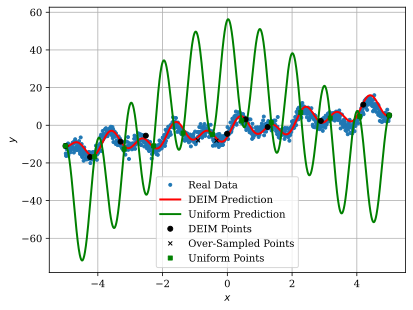

In [5]:
# Parameters
N = 1000
M = 12
r, p = 10, 2
λ = 0.25

# Generate data
x = np.linspace(-5, 5, N)
y = -3 + 2 * x + 3 * np.sin(np.pi * x) - 4 * np.cos(2 * np.pi * x + np.pi / 3) + np.random.normal(scale=2, size=N)

# Construct the design matrix Phi
# Uncomment one of the following lines to use a different polynomial basis
# Phi = np.polynomial.polynomial.polyvander(x, M-1)
# Phi = np.polynomial.chebyshev.chebvander(x, M-1)
# Phi = np.polynomial.laguerre.lagvander(x, M-1)
# Phi = np.polynomial.legendre.legvander(x, M-1)
Phi = []
for i in range(1, M // 4 + 1):
    Phi += [np.sin(i * np.pi * x), np.cos(i * np.pi * x)]
Phi = np.hstack((np.polynomial.polynomial.polyvander(x, M // 2 - 1), np.array(Phi).T))

# Reduce Phi to the first r columns
Phi = Phi[:, :r]

# GPODE algorithm
def GPODE(XI, r):
    G = lambda S: S[-2]**2-S[-1]**2 if XI.shape[1]>1 else S[-1]**2

    I = [np.argmax(np.abs(XI[:,0]))]
    for i in range(1, r):
        if i<XI.shape[1]:        
            res = XI[:,i] - XI[:,:i] @ np.linalg.solve(XI[I,:i], XI[I,i])
            I += [np.argmax(np.abs(res))]
        else:
            _, S, WT = np.linalg.svd(XI[I,:], full_matrices=False)
            g = G(S)
            Ub = WT @ XI.T
            R = g + np.sum(Ub**2, 0)
            R = R - np.sqrt(R**2 - 4*g*Ub[-1,:]**2)
            R[I] = -1
            I += [np.argmax(R)]
    return I

# DEIM indices
idx_DEIM = GPODE(Phi, r + p)

# DEIM Least Square Regression
z_DEIM = la.solve(Phi[idx_DEIM].T @ Phi[idx_DEIM], Phi[idx_DEIM].T @ y[idx_DEIM])
# DEIM Ridge Regression (uncomment to use)
# z_DEIM = la.solve(Phi[idx_DEIM].T @ Phi[idx_DEIM] + λ * np.eye(r), Phi[idx_DEIM].T @ y[idx_DEIM])
f_DEIM = Phi @ z_DEIM

# Uniform sampling
idx_unif = np.linspace(0, N - 1, r + p, dtype=int)
z_unif = la.lstsq(Phi[idx_unif], y[idx_unif], rcond=None)[0]
f_unif = Phi @ z_unif

# Plot the data and the predictions
fig, ax = plt.subplots()
ax.plot(x, y, '.', label='Real Data')
ax.plot(x, f_DEIM, 'r', lw=2.0, label='DEIM Prediction')
ax.plot(x, f_unif, 'g', lw=2.0, label='Uniform Prediction')
ax.plot(x[idx_DEIM[:r]], y[idx_DEIM[:r]], 'ok', markersize=5, label='DEIM Points')
ax.plot(x[idx_DEIM[r:]], y[idx_DEIM[r:]], 'xk', markersize=4, label='Over-Sampled Points')
ax.plot(x[idx_unif], y[idx_unif], 'sg', markersize=4, label='Uniform Points')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.legend()
ax.grid(True)
plt.show()

# Classification and Clustering

Although this tutorial series does not focus on classification or clustering methods, it's beneficial to be familiar with some prominent algorithms in these areas:

- **Logistic Regression:** A statistical model used for binary classification tasks, which estimates the probability of a categorical outcome using the logistic sigmoid function.

- **Support Vector Machines (SVM):** A supervised learning algorithm that identifies the optimal hyperplane to separate data into different classes, capable of handling both linear and nonlinear classification through kernel functions.

- **Decision Trees:** Models that make decisions by traversing a tree-like structure of nodes, where each node represents a test on an attribute, leading to a final prediction based on a series of if-then rules.

- **Random Forests:** An ensemble learning method that constructs multiple decision trees during training and outputs the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees, enhancing performance and reducing overfitting.

- **Gradient Boosting Machines (GBM):** An ensemble technique that builds models sequentially by training each new model to correct the errors of the previous ones, often resulting in highly accurate predictive models.

- **K-Nearest Neighbors (KNN):** A non-parametric algorithm that classifies data points based on the majority class among their nearest neighbors in the feature space.

- **Linear Discriminant Analysis (LDA):** A method used to find the linear combination of features that best separates two or more classes of objects or events.

- **Naïve Bayes:** A probabilistic classifier based on applying Bayes' theorem with strong (naïve) independence assumptions between the features.

- **K-Means Clustering:** An unsupervised learning algorithm that partitions data into $ K $ distinct non-overlapping clusters based on feature similarity, aiming to minimize within-cluster variances.